# Logistic Regression

It models the probability of the outcome variable with the logistic curve

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data set
Time spending in a store related to the decision to buy or not.

Active Drive and read the csv file with the weight and height data

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DeepLearning-Intro-part2/user_visit_duration.csv')

In [4]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


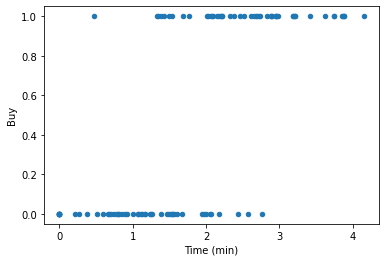

In [5]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

## Model building


In [7]:
# Import the type of model: Sequential, because we will add elements to this model in a sequence
from keras.models import Sequential
# To build a linear model we will need only dense layers
from keras.layers import Dense
# Import the optimizers, they change the weights and biases looking for the minimum cost
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


### Define the model 


In [0]:
# define the model to be sequential
model = Sequential()

```
Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

Just your regular densely-connected NN layer.

Dense implements the operation: $output = activation(dot(input, kernel) + bias)$ where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

In [0]:
# we add to the model a dense layer
# the first parammeter is the number of units that is how many outputs this layer will have 
# Since this is a logistic regression we will require a model with one output and one input
# We define the activation function as a sigmoid, this code implements the model -> sigma(x*w+b) 
model.add(Dense(1, input_shape=(1,), activation='sigmoid')) 

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We have a single layer called 'dense_1' the Output Shape is 1 number and it has 2 parameters. 
The reason that the Output Shape is (None, 1) is because the model can accept multiple points at once, instead of passing a single value we can ask for many values of x in one single call.

When we compile the model, Keras will construct the model based on the backend software that we define (here we are using TensorFlow model).



```
model.compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None, **kwargs)
```

We will use as loss function the 'binary crossentropy'



In [0]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

### Fit the model

In [0]:
X = df[['Time (min)']].values  #input data
y = df['Buy'].values #output data

Fit the model by using the input data, X, and the output data, y_true. In each iteration the loss is decreasing by looking for the W and B values. In this example it will search 25 times (25 epochs).


In [14]:
model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.7530 - accuracy: 0.5700
Epoch 2/25
100/100 [==============================] - 0s 88us/step - loss: 0.5695 - accuracy: 0.6300
Epoch 3/25
100/100 [==============================] - 0s 64us/step - loss: 0.5490 - accuracy: 0.8100
Epoch 4/25
100/100 [==============================] - 0s 70us/step - loss: 0.5313 - accuracy: 0.7600
Epoch 5/25
100/100 [==============================] - 0s 72us/step - loss: 0.5489 - accuracy: 0.7700
Epoch 6/25
100/100 [==============================] - 0s 76us/step - loss: 0.5096 - accuracy: 0.7500
Epoch 7/25
100/100 [==============================] - 0s 81us/step - loss: 0.4820 - accuracy: 0.8000
Epoch 8/25
100/100 [==============================] - 0s 80us/step - loss: 0.4637 - accuracy: 0.8300
Epoch 9/25
100/100 [==============================] - 0s 71us/step - loss: 0.4557 - accuracy: 0.8100
Epoch 10/25
100/100 [==============================] - 0s 77us/step - loss: 0.4480 - accurac

In [25]:
W, B = model.get_weights()
print(W,B)

[[1.8569658]] [-2.8634498]


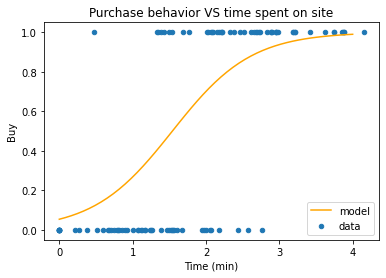

In [26]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')
# find a temporary linear space 
temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [0]:
# we can go from the predictive probability to the classes by using a threshold
temp_class = model.predict(temp) > 0.5

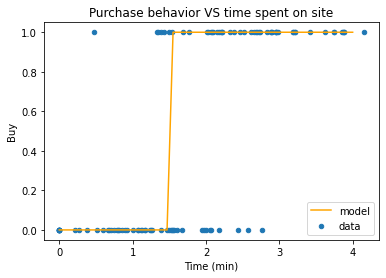

In [28]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')
temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

### Performance of the model

In [0]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [0]:
from sklearn.metrics import accuracy_score

In [31]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.800


### Train/test split


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
len(X_train)

80

In [36]:
len(X_test)

20

In [0]:
#reset the parameters of the model
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [40]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [41]:
#retrain the model in the selected sample
model.fit(X_train, y_train, epochs=25, verbose=0) #verbose=0 doesn't show each iteration

In [42]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.812
The test accuracy score is 0.850
